In [3]:
import numpy as np
import pandas as pd

In [4]:
# Colab의 출력을 소수점 이하 3자리로 제한
%precision 3
# Pandas DataFrame의 출력을 소수점 이하 3자리로 제한
pd.set_option('precision', 3)

In [5]:
en_scores = [42, 69, 56, 41, 57, 48, 65, 49, 65, 58]
ma_scores = [65, 80, 63, 63, 76, 60, 81, 66, 82, 78]

In [6]:
scores_df = pd.DataFrame(
    {
        'english': en_scores,
        'mathematics': ma_scores
    },
    index=pd.Index(
        [
            'A', 'B', 'C', 'D', 'E',
            'F', 'G', 'H', 'I', 'J'
        ],
        name='student'
    )
)

In [7]:
scores_df

,english,mathematics
student,,
A,42,65
B,69,80
C,56,63
D,41,63
E,57,76
F,48,60
G,65,81
H,49,66
I,65,82


In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

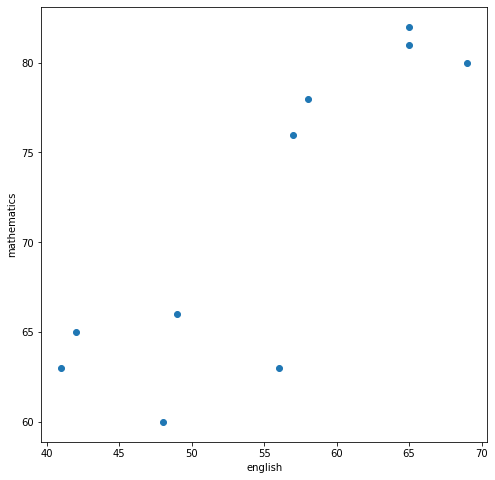

In [9]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1)
# 산점도
ax.scatter(scores_df['english'], scores_df['mathematics'])
ax.set_xlabel('english')
ax.set_ylabel('mathematics')

plt.show()

In [10]:
summary_df = scores_df.copy()
summary_df['english_deviation'] = \
    summary_df['english'] - summary_df['mathematics'].mean()
summary_df['mathematics_deviation'] = \
    summary_df['mathematics'] - summary_df['mathematics'].mean()
summary_df['product of deviations'] = \
    summary_df['english_deviation'] * summary_df['mathematics_deviation']
summary_df

,english,mathematics,english_deviation,mathematics_deviation,product of deviations
student,,,,,
A,42,65,-29.4,-6.4,188.16
B,69,80,-2.4,8.6,-20.64
C,56,63,-15.4,-8.4,129.36
D,41,63,-30.4,-8.4,255.36
E,57,76,-14.4,4.6,-66.24
F,48,60,-23.4,-11.4,266.76
G,65,81,-6.4,9.6,-61.44
H,49,66,-22.4,-5.4,120.96
I,65,82,-6.4,10.6,-67.84


In [11]:
summary_df['product of deviations'].mean()

65.600

In [15]:
np.cov(summary_df['english'], summary_df['mathematics'], ddof=0)

array([[86.  , 65.6 ],
       [65.6 , 68.44]])

In [16]:
np.var(summary_df['english'], ddof=0), np.var(summary_df['mathematics'], ddof=0)

(86.000, 68.440)

In [18]:
# 영어와 수학의 Covariance / (영어의 표준편차 X 수학의 표준편차)
np.cov(summary_df['english'], summary_df['mathematics'], ddof=0)[0,1] /\
    (np.std(summary_df['english']) * np.std(summary_df['mathematics']))

0.855

In [20]:
np.corrcoef(summary_df['english'], summary_df['mathematics'])

array([[1.   , 0.855],
       [0.855, 1.   ]])

In [21]:
scores_df.corr()

,english,mathematics
english,1.000,0.855
mathematics,0.855,1.000


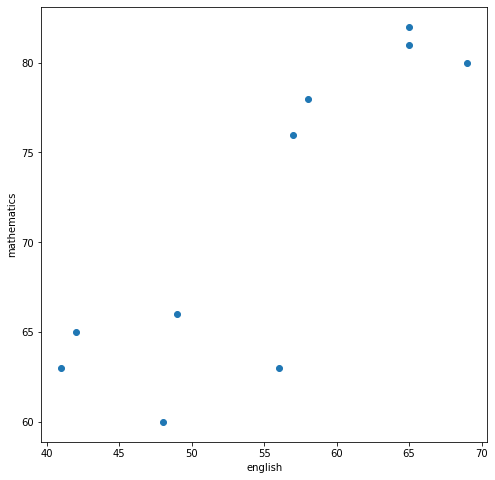

In [23]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1, 1, 1)
# 산점도 시각화
ax.scatter(scores_df['english'], scores_df['mathematics'])
ax.set_xlabel('english')
ax.set_ylabel('mathematics')

plt.show()

In [28]:
# 계수 beta_0과 beta_1을 구한다
poly_fit = np.polyfit(scores_df['english'], scores_df['mathematics'], 1)
# beta_0 + beta_1 * x 를 반환하는 함수 작성
poly_1d = np.poly1d(poly_fit)
# 직선을 그리기 위해 x좌표 생성
xs = np.linspace(scores_df['english'].min(), scores_df['english'].max())
# xs에 대응하는 y좌표 연산
ys = poly_1d(xs)

array([60.721, 61.157, 61.593, 62.029, 62.464, 62.9  , 63.336, 63.772,
       64.208, 64.644, 65.08 , 65.516, 65.951, 66.387, 66.823, 67.259,
       67.695, 68.131, 68.567, 69.003, 69.439, 69.874, 70.31 , 70.746,
       71.182, 71.618, 72.054, 72.49 , 72.926, 73.361, 73.797, 74.233,
       74.669, 75.105, 75.541, 75.977, 76.413, 76.849, 77.284, 77.72 ,
       78.156, 78.592, 79.028, 79.464, 79.9  , 80.336, 80.771, 81.207,
       81.643, 82.079])

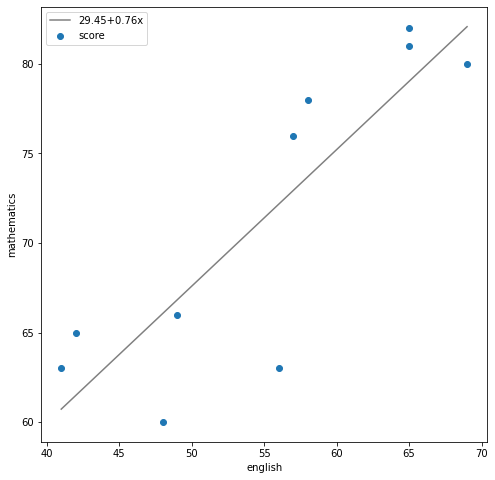

In [29]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1, 1, 1)
ax.scatter(scores_df['english'], scores_df['mathematics'], label='score')
ax.plot(
    xs, ys, color='gray',
    label=f'{poly_fit[1]:.2f}+{poly_fit[0]:.2f}x'
)
ax.set_xlabel('english')
ax.set_ylabel('mathematics')
# 범례 표시
ax.legend(loc='upper left')

plt.show()

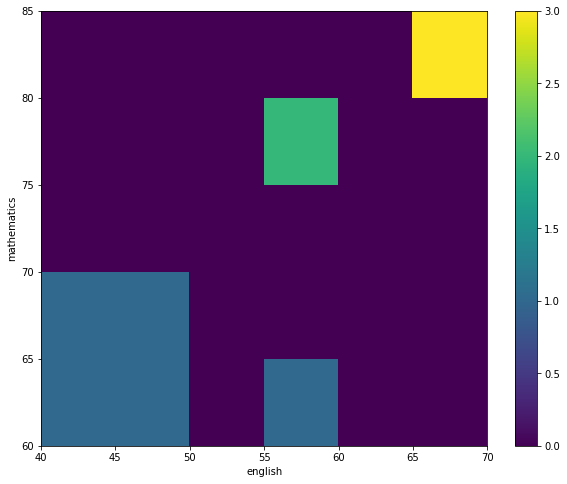

In [34]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(1, 1, 1)

c = ax.hist2d(
    scores_df['english'], scores_df['mathematics'], 
    bins=[6,5], range=[(40,70), (60, 85)]
)
ax.set_xlabel('english')
ax.set_ylabel('mathematics')
ax.set_xticks(c[1])
ax.set_yticks(c[2])

# 컬러 바 표시
fig.colorbar(c[3], ax=ax)
plt.show()

In [38]:
# colab이 자체 제공하는 sample인 anscombe.json 활용하기
# Json파일을 열 수 있는 Json Library 활용
import json

# pretty하게 print를 하는 pprint 활용
from pprint import pprint

In [54]:
# Json file 읽기 -> records 형식으로 읽힘
with open('sample_data/anscombe.json') as filename:
    anscombe = json.load(filename)
pprint(anscombe[:5])

[{'Series': 'I', 'X': 10.0, 'Y': 8.04},
 {'Series': 'I', 'X': 8.0, 'Y': 6.95},
 {'Series': 'I', 'X': 13.0, 'Y': 7.58},
 {'Series': 'I', 'X': 9.0, 'Y': 8.81},
 {'Series': 'I', 'X': 11.0, 'Y': 8.33}]


In [57]:
# records 형식의 data to Pandas DataFrame
df_anscombe = pd.DataFrame.from_records(anscombe, index='Series')
df_anscombe.head()

,X,Y
Series,,
I,10.0,8.04
I,8.0,6.95
I,13.0,7.58
I,9.0,8.81
I,11.0,8.33


In [56]:
df_anscombe.shape

(44, 2)

In [70]:
df_anscombe.index.unique()

Index(['I', 'II', 'III', 'IV'], dtype='object', name='Series')

In [61]:
df_anscombe[df_anscombe.index=='I']

,X,Y
Series,,
I,10.0,8.04
I,8.0,6.95
I,13.0,7.58
I,9.0,8.81
I,11.0,8.33
I,14.0,9.96
I,6.0,7.24
I,4.0,4.26
I,12.0,10.84


In [58]:
# 평균, 분산, 상관계수, 회귀직선 계산하여 DataFrame으로 정리하기
# 초기 값 설정
stats_df = pd.DataFrame(
    index=[
        'X_mean', 'X_variance', 'Y_mean', 'Y_variance', 
        'X&Y_correlation', 'X&Y_regression line'
    ]
)

In [65]:
df_anscombe[df_anscombe.index=='I']['X']

Series
I    10.0
I     8.0
I    13.0
I     9.0
I    11.0
I    14.0
I     6.0
I     4.0
I    12.0
I     7.0
I     5.0
Name: X, dtype: float64

In [69]:
# 4개 Series 별로 통계지표 계산하기
for series in list(df_anscombe.index.unique()):
    dataX = df_anscombe[df_anscombe.index==series]['X']
    dataY = df_anscombe[df_anscombe.index==series]['Y']
    poly_fit = np.polyfit(dataX, dataY, 1)
    stats_df[f'data{series}'] = \
        [
            f'{np.mean(dataX):.2f}',
            f'{np.var(dataX):.2f}',
            f'{np.mean(dataY):.2f}',
            f'{np.var(dataY):.2f}',
            f'{np.corrcoef(dataX, dataY)[0,1]:.2f}',
            f'{poly_fit[1]:.2f}+{poly_fit[0]:.2f}x'
        ]
stats_df

,dataI,dataII,dataIII,dataIV
X_mean,9.00,9.00,9.00,9.00
X_variance,10.00,10.00,10.00,10.00
Y_mean,7.50,7.50,7.50,7.50
Y_variance,3.76,3.75,3.75,3.75
X&Y_correlation,0.82,0.82,0.82,0.82
X&Y_regression line,3.00+0.50x,3.00+0.50x,3.00+0.50x,3.00+0.50x


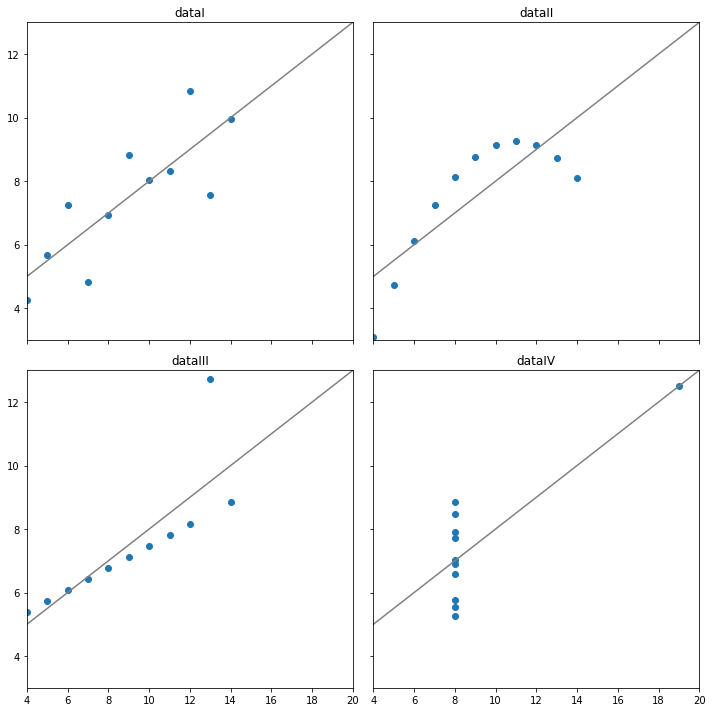

In [72]:
# 4개 그래프를 그리기위한 2X2 영역 생성
fig, axes = plt.subplots(
    nrows=2, ncols=2, figsize=(10,10),
    sharex=True, sharey=True
)

xs = np.linspace(0, 30, 100)
for i, series in enumerate(list(df_anscombe.index.unique())):
    dataX = df_anscombe[df_anscombe.index==series]['X']
    dataY = df_anscombe[df_anscombe.index==series]['Y']
    poly_fit = np.polyfit(dataX, dataY, 1)
    poly_1d = np.poly1d(poly_fit)
    ys = poly_1d(xs)
    # 그리는 영역 선택
    ax = axes[i//2, i%2]
    ax.set_xlim([4, 20])
    ax.set_ylim([3, 13])
    # 타이틀 부여
    ax.set_title(f'data{series}')
    ax.scatter(dataX, dataY)
    ax.plot(xs, ys, color='gray')

# 그래프 사이 간격 좁히기
plt.tight_layout()
plt.show()